# Huấn luyện và đánh giá RetinaFace

In [ ]:
!git clone https://github.com/biubug6/Pytorch_Retinaface.git

Cloning into 'Pytorch_Retinaface'...
remote: Enumerating objects: 123, done.
remote: Total 123 (delta 0), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (123/123), 6.81 MiB | 12.23 MiB/s, done.
Resolving deltas: 100% (41/41), done.


In [ ]:
!gdown 11UGV3nbVv1x9IC--_tK3Uxf7hA6rlbsS # Dataset
!gdown 1ZgRFpwvs-64Q3IspGvQnrKJZ2tfRCAZ2 # Pre-trained mobilenet
!gdown 14G1_fMAUDAcvs-WjYTwMZq-XG8huG4TG # Pre-trained resnet50
!gdown 1e3uqaMPDEq81fD8k5is-2sC7kpCdmAkB # mobilenet0.25

Downloading...
From: https://drive.google.com/uc?id=11UGV3nbVv1x9IC--_tK3Uxf7hA6rlbsS
To: /content/widerface.zip
100% 1.83G/1.83G [00:21<00:00, 84.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ZgRFpwvs-64Q3IspGvQnrKJZ2tfRCAZ2
To: /content/mobilenet0.25_Final.pth
100% 1.79M/1.79M [00:00<00:00, 13.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=14G1_fMAUDAcvs-WjYTwMZq-XG8huG4TG
To: /content/Resnet50_Final.pth
100% 109M/109M [00:03<00:00, 28.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1e3uqaMPDEq81fD8k5is-2sC7kpCdmAkB
To: /content/mobilenetV1X0.25_pretrain.tar
100% 3.83M/3.83M [00:00<00:00, 23.3MB/s]


In [ ]:
!unzip /content/widerface.zip

Streaming output truncated to the last 5000 lines.
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_474.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_476.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_478.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_480.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_49.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_491.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_494.jpg  
  inflating: widerface/train/images/55--Sports_Coach_Trainer/55_Sports_Coach_Trainer_sportcoaching_55_498.jpg  
  inflating: widerface/train/images/55--Sports_Coach_T

In [ ]:
%cd /content/Pytorch_Retinaface

/content/Pytorch_Retinaface


In [ ]:
!python train.py --network resnet50

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Printing net...
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


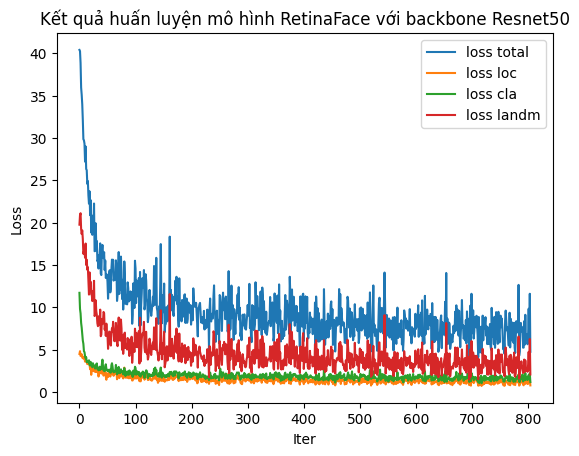

In [ ]:
import matplotlib.pyplot as plt

loss_history, loss_l_h, loss_c_h, loss_landm_h = [], [], [], []

with open('/content/drive/MyDrive/loss_history.txt', mode='r') as f:
  for losses in f:
    loss, loss_l, loss_c, loss_landm = losses[:-2].split(', ')
    loss_history.append(float(loss))
    loss_l_h.append(float(loss_l))
    loss_c_h.append(float(loss_c))
    loss_landm_h.append(float(loss_landm))

plt.title("Kết quả huấn luyện mô hình RetinaFace với backbone Resnet50")
plt.plot(loss_history, label="loss total")
plt.plot(loss_l_h, label="loss loc")
plt.plot(loss_c_h, label="loss cla")
plt.plot(loss_landm_h, label="loss landm")
plt.xlabel("Iter")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
%cd /content/Pytorch_Retinaface/
!python test_widerface.py --trained_model weights/Resnet50_Final.pth --network resnet50

/content/Pytorch_Retinaface
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading pretrained model from weights/Resnet50_Final.pth
remove prefix 'module.'
Missing keys:0
Unused checkpoint keys:0
Used keys:456
Finished loading model!
RetinaFace(
  (body): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, a

In [ ]:
%cd /content/Pytorch_Retinaface/widerface_evaluate
!python setup.py build_ext --inplace
!python evaluation.py

/content/Pytorch_Retinaface/widerface_evaluate
/content/Pytorch_Retinaface/widerface_evaluate/evaluation.py:95: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if line[0] is '':
/content/Pytorch_Retinaface/widerface_evaluate/evaluation.py:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from bbox import bbox_overlaps
Reading Predictions : 100% 61/61 [00:01<00:00, 49.93it/s]
Processing easy: 100% 61/61 [00:29<00:00,  2.06it/s]
Processing medium: 100% 61/61 [00:31<00:00,  1.96it/s]
Processing hard: 100% 61/61 [00:32<00:00,  1.85it/s]
==================== Results ====================
Easy   Val AP: 0.879685087643755
Medium Val AP: 0.8462189137230266
Hard 

In [ ]:
!zip -r /content/drive/MyDrive/retinaface.zip /content/Pytorch_Retinaface

Streaming output truncated to the last 5000 lines.
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_133.jpg (deflated 0%)
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_Group_12_Group_Group_12_235.jpg (deflated 1%)
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_Large_Group_12_Group_Large_Group_12_244.jpg (deflated 0%)
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_275.jpg (deflated 0%)
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_Group_12_Group_Group_12_615.jpg (deflated 0%)
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_Team_Organized_Group_12_Group_Team_Organized_Group_12_598.jpg (deflated 0%)
  adding: content/Pytorch_Retinaface/data/widerface/train/images/12--Group/12_Group_L

# Đánh giá ArcFace

In [1]:
!pip install deepface

In [4]:
import time
import random

from sklearn.datasets import fetch_lfw_pairs
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace
from tqdm import tqdm
import pandas as pd

In [5]:
#lfw_people = fetch_lfw_people()
fetch_lfw_pairs = fetch_lfw_pairs(subset = 'test', color = True
                                  , resize = 1 #this transform inputs to (125, 94) from (62, 47)
                                 )

In [6]:
pairs = fetch_lfw_pairs.pairs
labels = fetch_lfw_pairs.target
target_names = fetch_lfw_pairs.target_names

In [7]:
target_names

array(['Different persons', 'Same person'], dtype='<U17')

In [8]:
instances = pairs.shape[0]
print("instances: ", instances)

instances:  1000


In [9]:
from deepface.basemodels import ArcFace

model = ArcFace.loadModel()
print("ArcFace loaded")

ArcFace loaded


In [10]:
plot = False
threshold = 0.68

actuals, predictions, distances = [], [], []

def findCosineDistance(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

for i in tqdm(range(instances)):
    pair = pairs[i]
    img1 = pair[0]; img2 = pair[1]
    img1 = img1[:,:,::-1]; img2 = img2[:,:,::-1]

    # obj = DeepFace.verify(img1, img2, model_name = 'ArcFace', distance_metric = 'euclidean', enforce_detection=False)
    # prediction = obj["verified"]
    # predictions.append(prediction)

    img1 = np.expand_dims(cv2.resize(img1, (112, 112)), axis=0)
    img2 = np.expand_dims(cv2.resize(img2, (112, 112)), axis=0)

    rep1 = model.predict(img1)
    rep2 = model.predict(img2)

    distance = findCosineDistance(rep1.reshape(-1), rep2.reshape(-1))

    prediction = True if distance <= threshold else False
    predictions.append(prediction)

    label = target_names[labels[i]]
    actual = True if labels[i] == 1 else False
    actuals.append(actual)

    # print(actual, prediction)

    if plot:
        pred_label = target_names[1 if prediction == True else 0]
        # plt.title(f'Actual: {label}, Predicted: {pred_label}')
        # plt.axis('off')

        plt.subplot(1,2,1)
        plt.title(f'Actual: {label}')
        plt.imshow(img1[0][:,:,::-1])
        plt.axis('off')

        plt.subplot(1,2,2)
        plt.title(f'Predicted: {pred_label}')
        plt.imshow(img2[0][:,:,::-1])
        plt.axis('off')


        plt.show()

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  0%|          | 1/1000 [00:03<59:54,  3.60s/it]

1/1 [==============================] - 0s 23ms/step


  0%|          | 2/1000 [00:03<26:16,  1.58s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 3/1000 [00:03<15:29,  1.07it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 4/1000 [00:04<10:26,  1.59it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 5/1000 [00:04<07:42,  2.15it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 6/1000 [00:04<06:04,  2.73it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 7/1000 [00:04<04:57,  3.34it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 8/1000 [00:04<04:16,  3.86it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 9/1000 [00:04<03:45,  4.39it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 10/1000 [00:05<03:25,  4.81it/s]

1/1 [==============================] - 0s 28ms/step


  1%|          | 11/1000 [00:05<03:15,  5.07it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 12/1000 [00:05<03:09,  5.22it/s]

1/1 [==============================] - 0s 41ms/step


  1%|▏         | 13/1000 [00:05<03:27,  4.75it/s]

1/1 [==============================] - 0s 35ms/step


  1%|▏         | 14/1000 [00:05<03:31,  4.66it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 15/1000 [00:06<03:36,  4.56it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 16/1000 [00:06<03:40,  4.46it/s]

1/1 [==============================] - 0s 33ms/step


  2%|▏         | 17/1000 [00:06<03:39,  4.47it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 18/1000 [00:06<03:44,  4.38it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 19/1000 [00:07<03:38,  4.49it/s]

1/1 [==============================] - 0s 46ms/step


  2%|▏         | 20/1000 [00:07<03:47,  4.30it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 21/1000 [00:07<03:50,  4.25it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 22/1000 [00:07<03:46,  4.32it/s]

1/1 [==============================] - 0s 44ms/step


  2%|▏         | 23/1000 [00:08<03:47,  4.29it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 24/1000 [00:08<03:52,  4.19it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▎         | 25/1000 [00:08<03:51,  4.21it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 26/1000 [00:08<03:50,  4.23it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 27/1000 [00:08<03:47,  4.27it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 28/1000 [00:09<03:45,  4.31it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 29/1000 [00:09<03:46,  4.28it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 30/1000 [00:09<03:46,  4.28it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 31/1000 [00:09<03:46,  4.28it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 32/1000 [00:10<03:48,  4.24it/s]

1/1 [==============================] - 0s 43ms/step


  3%|▎         | 33/1000 [00:10<03:50,  4.20it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 34/1000 [00:10<03:53,  4.14it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▎         | 35/1000 [00:10<03:53,  4.14it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 36/1000 [00:11<03:37,  4.44it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 37/1000 [00:11<03:18,  4.85it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 38/1000 [00:11<03:08,  5.10it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 39/1000 [00:11<03:00,  5.33it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 40/1000 [00:11<02:53,  5.54it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 41/1000 [00:11<02:49,  5.65it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 42/1000 [00:12<02:50,  5.61it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 43/1000 [00:12<02:49,  5.65it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 44/1000 [00:12<02:47,  5.71it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 45/1000 [00:12<02:45,  5.78it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 46/1000 [00:12<02:42,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 47/1000 [00:12<02:44,  5.78it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 48/1000 [00:13<02:42,  5.84it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 49/1000 [00:13<02:40,  5.93it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 50/1000 [00:13<02:40,  5.91it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 51/1000 [00:13<02:36,  6.05it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 52/1000 [00:13<02:37,  6.00it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 53/1000 [00:13<02:36,  6.05it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 54/1000 [00:14<02:36,  6.04it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 55/1000 [00:14<02:39,  5.94it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 56/1000 [00:14<02:39,  5.92it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 57/1000 [00:14<02:37,  5.98it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 58/1000 [00:14<02:38,  5.93it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 59/1000 [00:14<02:36,  6.01it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 60/1000 [00:15<02:33,  6.12it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 61/1000 [00:15<02:39,  5.90it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 62/1000 [00:15<02:37,  5.94it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▋         | 63/1000 [00:15<02:33,  6.09it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 64/1000 [00:15<02:32,  6.16it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▋         | 65/1000 [00:15<02:35,  6.01it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 66/1000 [00:16<02:34,  6.06it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 67/1000 [00:16<02:36,  5.98it/s]

1/1 [==============================] - 0s 24ms/step


  7%|▋         | 68/1000 [00:16<02:36,  5.95it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 69/1000 [00:16<02:34,  6.01it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 70/1000 [00:16<02:35,  5.96it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 71/1000 [00:16<02:33,  6.03it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 72/1000 [00:17<02:33,  6.06it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 73/1000 [00:17<02:36,  5.92it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 74/1000 [00:17<02:38,  5.83it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 75/1000 [00:17<02:36,  5.90it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 76/1000 [00:17<02:36,  5.92it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 77/1000 [00:17<02:36,  5.91it/s]

1/1 [==============================] - 0s 22ms/step


  8%|▊         | 78/1000 [00:18<02:33,  6.01it/s]

1/1 [==============================] - 0s 23ms/step


  8%|▊         | 79/1000 [00:18<02:45,  5.57it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 80/1000 [00:18<02:40,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 81/1000 [00:18<02:36,  5.89it/s]

1/1 [==============================] - 0s 104ms/step


  8%|▊         | 82/1000 [00:19<03:40,  4.17it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 83/1000 [00:19<05:16,  2.90it/s]

1/1 [==============================] - 0s 25ms/step


  8%|▊         | 84/1000 [00:19<04:30,  3.39it/s]

1/1 [==============================] - 0s 24ms/step


  8%|▊         | 85/1000 [00:19<03:53,  3.92it/s]

1/1 [==============================] - 0s 139ms/step


  9%|▊         | 86/1000 [00:20<04:44,  3.21it/s]

1/1 [==============================] - 0s 81ms/step


  9%|▊         | 87/1000 [00:20<05:42,  2.67it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 88/1000 [00:21<06:09,  2.47it/s]

1/1 [==============================] - 0s 197ms/step


  9%|▉         | 89/1000 [00:22<07:34,  2.00it/s]

1/1 [==============================] - 0s 92ms/step


  9%|▉         | 90/1000 [00:23<09:34,  1.58it/s]

1/1 [==============================] - 0s 39ms/step


  9%|▉         | 91/1000 [00:23<07:46,  1.95it/s]

1/1 [==============================] - 0s 44ms/step


  9%|▉         | 92/1000 [00:23<06:43,  2.25it/s]

1/1 [==============================] - 0s 41ms/step


  9%|▉         | 93/1000 [00:23<05:53,  2.57it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 94/1000 [00:24<05:12,  2.90it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 95/1000 [00:24<04:39,  3.24it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 96/1000 [00:24<04:18,  3.49it/s]

1/1 [==============================] - 0s 37ms/step


 10%|▉         | 97/1000 [00:24<04:09,  3.62it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 98/1000 [00:25<03:54,  3.84it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 99/1000 [00:25<03:46,  3.97it/s]

1/1 [==============================] - 0s 47ms/step


 10%|█         | 100/1000 [00:25<03:42,  4.05it/s]

1/1 [==============================] - 0s 39ms/step


 10%|█         | 101/1000 [00:25<03:38,  4.12it/s]

1/1 [==============================] - 0s 38ms/step


 10%|█         | 102/1000 [00:25<03:40,  4.07it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 103/1000 [00:26<03:43,  4.02it/s]

1/1 [==============================] - 0s 26ms/step


 10%|█         | 104/1000 [00:26<03:21,  4.44it/s]

1/1 [==============================] - 0s 24ms/step


 10%|█         | 105/1000 [00:26<03:07,  4.77it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 106/1000 [00:26<02:56,  5.05it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 107/1000 [00:26<02:46,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█         | 108/1000 [00:27<02:41,  5.51it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 109/1000 [00:27<02:36,  5.68it/s]

1/1 [==============================] - 0s 22ms/step


 11%|█         | 110/1000 [00:27<02:31,  5.89it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 111/1000 [00:27<02:33,  5.78it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█         | 112/1000 [00:27<02:30,  5.89it/s]

1/1 [==============================] - 0s 24ms/step


 11%|█▏        | 113/1000 [00:27<02:26,  6.05it/s]

1/1 [==============================] - 0s 23ms/step


 11%|█▏        | 114/1000 [00:28<02:25,  6.09it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 115/1000 [00:28<02:30,  5.90it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 116/1000 [00:28<02:27,  6.00it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 117/1000 [00:28<02:25,  6.06it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 118/1000 [00:28<02:27,  5.99it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 119/1000 [00:28<02:25,  6.04it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▏        | 120/1000 [00:29<02:25,  6.05it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 121/1000 [00:29<02:27,  5.98it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 122/1000 [00:29<02:26,  5.98it/s]

1/1 [==============================] - 0s 23ms/step


 12%|█▏        | 123/1000 [00:29<02:24,  6.07it/s]

1/1 [==============================] - 0s 25ms/step


 12%|█▏        | 124/1000 [00:29<02:26,  5.98it/s]

1/1 [==============================] - 0s 24ms/step


 12%|█▎        | 125/1000 [00:29<02:26,  5.97it/s]

1/1 [==============================] - 0s 22ms/step


 13%|█▎        | 126/1000 [00:30<02:24,  6.05it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 127/1000 [00:30<02:26,  5.94it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 128/1000 [00:30<02:26,  5.94it/s]

1/1 [==============================] - 0s 25ms/step


 13%|█▎        | 129/1000 [00:30<02:29,  5.84it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 130/1000 [00:30<02:29,  5.83it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 131/1000 [00:30<02:27,  5.88it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 132/1000 [00:31<02:24,  6.00it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 133/1000 [00:31<02:25,  5.97it/s]

1/1 [==============================] - 0s 23ms/step


 13%|█▎        | 134/1000 [00:31<02:25,  5.94it/s]

1/1 [==============================] - 0s 25ms/step


 14%|█▎        | 135/1000 [00:31<02:24,  5.98it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 136/1000 [00:31<02:25,  5.93it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▎        | 137/1000 [00:31<02:25,  5.92it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 138/1000 [00:32<02:25,  5.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 139/1000 [00:32<02:24,  5.96it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█▍        | 140/1000 [00:32<02:25,  5.92it/s]

1/1 [==============================] - 0s 22ms/step


 14%|█▍        | 141/1000 [00:32<02:23,  6.00it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 142/1000 [00:32<02:26,  5.87it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 143/1000 [00:32<02:23,  5.99it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 144/1000 [00:33<02:21,  6.05it/s]

1/1 [==============================] - 0s 23ms/step


 14%|█▍        | 145/1000 [00:33<02:20,  6.07it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 146/1000 [00:33<02:21,  6.05it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 147/1000 [00:33<02:20,  6.06it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▍        | 148/1000 [00:33<02:22,  5.96it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▍        | 149/1000 [00:33<02:21,  6.03it/s]

1/1 [==============================] - 0s 26ms/step


 15%|█▌        | 150/1000 [00:34<02:20,  6.06it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 151/1000 [00:34<02:20,  6.04it/s]

1/1 [==============================] - 0s 23ms/step


 15%|█▌        | 152/1000 [00:34<02:20,  6.04it/s]

1/1 [==============================] - 0s 25ms/step


 15%|█▌        | 153/1000 [00:34<02:19,  6.06it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 154/1000 [00:34<02:20,  6.03it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 155/1000 [00:34<02:22,  5.95it/s]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 156/1000 [00:35<02:21,  5.94it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 157/1000 [00:35<02:20,  5.99it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 158/1000 [00:35<02:20,  5.98it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 159/1000 [00:35<02:38,  5.32it/s]

1/1 [==============================] - 0s 23ms/step


 16%|█▌        | 160/1000 [00:35<02:37,  5.34it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 161/1000 [00:36<02:33,  5.45it/s]

1/1 [==============================] - 0s 46ms/step


 16%|█▌        | 162/1000 [00:36<02:58,  4.68it/s]

1/1 [==============================] - 0s 39ms/step


 16%|█▋        | 163/1000 [00:36<03:06,  4.48it/s]

1/1 [==============================] - 0s 37ms/step


 16%|█▋        | 164/1000 [00:36<03:18,  4.22it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█▋        | 165/1000 [00:37<03:22,  4.13it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 166/1000 [00:37<03:21,  4.14it/s]

1/1 [==============================] - 0s 44ms/step


 17%|█▋        | 167/1000 [00:37<03:25,  4.06it/s]

1/1 [==============================] - 0s 40ms/step


 17%|█▋        | 168/1000 [00:37<03:20,  4.16it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 169/1000 [00:38<03:30,  3.95it/s]

1/1 [==============================] - 0s 36ms/step


 17%|█▋        | 170/1000 [00:38<03:24,  4.06it/s]

1/1 [==============================] - 0s 39ms/step


 17%|█▋        | 171/1000 [00:38<03:25,  4.04it/s]

1/1 [==============================] - 0s 42ms/step


 17%|█▋        | 172/1000 [00:38<03:20,  4.13it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 173/1000 [00:39<03:18,  4.16it/s]

1/1 [==============================] - 0s 35ms/step


 17%|█▋        | 174/1000 [00:39<03:14,  4.24it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 175/1000 [00:39<03:23,  4.05it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 176/1000 [00:39<03:17,  4.16it/s]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 177/1000 [00:40<03:27,  3.97it/s]

1/1 [==============================] - 0s 46ms/step


 18%|█▊        | 178/1000 [00:40<03:34,  3.83it/s]

1/1 [==============================] - 0s 47ms/step


 18%|█▊        | 179/1000 [00:40<03:35,  3.82it/s]

1/1 [==============================] - 0s 37ms/step


 18%|█▊        | 180/1000 [00:40<03:27,  3.96it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 181/1000 [00:41<03:23,  4.03it/s]

1/1 [==============================] - 0s 39ms/step


 18%|█▊        | 182/1000 [00:41<03:19,  4.10it/s]

1/1 [==============================] - 0s 25ms/step


 18%|█▊        | 183/1000 [00:41<03:10,  4.29it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 184/1000 [00:41<02:57,  4.61it/s]

1/1 [==============================] - 0s 23ms/step


 18%|█▊        | 185/1000 [00:41<02:45,  4.94it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▊        | 186/1000 [00:42<02:37,  5.18it/s]

1/1 [==============================] - 0s 22ms/step


 19%|█▊        | 187/1000 [00:42<02:30,  5.39it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 188/1000 [00:42<02:27,  5.49it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 189/1000 [00:42<02:25,  5.58it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 190/1000 [00:42<02:21,  5.71it/s]

1/1 [==============================] - 0s 23ms/step


 19%|█▉        | 191/1000 [00:42<02:21,  5.73it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 192/1000 [00:43<02:21,  5.73it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▉        | 193/1000 [00:43<02:21,  5.70it/s]

1/1 [==============================] - 0s 24ms/step


 19%|█▉        | 194/1000 [00:43<02:18,  5.83it/s]

1/1 [==============================] - 0s 23ms/step


 20%|█▉        | 195/1000 [00:43<02:16,  5.90it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 196/1000 [00:43<02:15,  5.91it/s]

1/1 [==============================] - 0s 26ms/step


 20%|█▉        | 197/1000 [00:43<02:17,  5.84it/s]

1/1 [==============================] - 0s 22ms/step


 20%|█▉        | 198/1000 [00:44<02:14,  5.96it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 199/1000 [00:44<02:16,  5.88it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 200/1000 [00:44<02:14,  5.96it/s]

1/1 [==============================] - 0s 26ms/step


 20%|██        | 201/1000 [00:44<02:16,  5.86it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 202/1000 [00:44<02:13,  5.98it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 203/1000 [00:44<02:13,  5.96it/s]

1/1 [==============================] - 0s 23ms/step


 20%|██        | 204/1000 [00:45<02:12,  6.00it/s]

1/1 [==============================] - 0s 22ms/step


 20%|██        | 205/1000 [00:45<02:13,  5.96it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 206/1000 [00:45<02:13,  5.93it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 207/1000 [00:45<02:11,  6.03it/s]

1/1 [==============================] - 0s 23ms/step


 21%|██        | 208/1000 [00:45<02:10,  6.07it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██        | 209/1000 [00:45<02:09,  6.10it/s]

1/1 [==============================] - 0s 22ms/step


 21%|██        | 210/1000 [00:46<02:09,  6.09it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 211/1000 [00:46<02:14,  5.86it/s]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 212/1000 [00:46<02:14,  5.85it/s]

1/1 [==============================] - 0s 27ms/step


 21%|██▏       | 213/1000 [00:46<02:12,  5.92it/s]

1/1 [==============================] - 0s 24ms/step


 21%|██▏       | 214/1000 [00:46<02:11,  6.00it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 215/1000 [00:46<02:13,  5.90it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 216/1000 [00:47<02:12,  5.92it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 217/1000 [00:47<02:12,  5.90it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▏       | 218/1000 [00:47<02:12,  5.88it/s]

1/1 [==============================] - 0s 26ms/step


 22%|██▏       | 219/1000 [00:47<02:13,  5.83it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 220/1000 [00:47<02:14,  5.81it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 221/1000 [00:47<02:12,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 222/1000 [00:48<02:11,  5.91it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 223/1000 [00:48<02:13,  5.80it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 224/1000 [00:48<02:14,  5.77it/s]

1/1 [==============================] - 0s 23ms/step


 22%|██▎       | 225/1000 [00:48<02:14,  5.75it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 226/1000 [00:48<02:12,  5.84it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 227/1000 [00:48<02:10,  5.94it/s]

1/1 [==============================] - 0s 21ms/step


 23%|██▎       | 228/1000 [00:49<02:05,  6.13it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 229/1000 [00:49<02:11,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 230/1000 [00:49<02:14,  5.71it/s]

1/1 [==============================] - 0s 22ms/step


 23%|██▎       | 231/1000 [00:49<02:11,  5.87it/s]

1/1 [==============================] - 0s 25ms/step


 23%|██▎       | 232/1000 [00:49<02:10,  5.88it/s]

1/1 [==============================] - 0s 24ms/step


 23%|██▎       | 233/1000 [00:49<02:10,  5.89it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 234/1000 [00:50<02:08,  5.94it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▎       | 235/1000 [00:50<02:09,  5.91it/s]

1/1 [==============================] - 0s 32ms/step


 24%|██▎       | 236/1000 [00:50<02:10,  5.84it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▎       | 237/1000 [00:50<02:11,  5.80it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 238/1000 [00:50<02:11,  5.80it/s]

1/1 [==============================] - 0s 23ms/step


 24%|██▍       | 239/1000 [00:50<02:08,  5.93it/s]

1/1 [==============================] - 0s 24ms/step


 24%|██▍       | 240/1000 [00:51<02:05,  6.04it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 241/1000 [00:51<02:10,  5.84it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 242/1000 [00:51<02:32,  4.98it/s]

1/1 [==============================] - 0s 36ms/step


 24%|██▍       | 243/1000 [00:51<02:38,  4.79it/s]

1/1 [==============================] - 0s 39ms/step


 24%|██▍       | 244/1000 [00:52<02:46,  4.53it/s]

1/1 [==============================] - 0s 48ms/step


 24%|██▍       | 245/1000 [00:52<03:02,  4.14it/s]

1/1 [==============================] - 0s 39ms/step


 25%|██▍       | 246/1000 [00:52<02:59,  4.20it/s]

1/1 [==============================] - 0s 35ms/step


 25%|██▍       | 247/1000 [00:52<02:59,  4.21it/s]

1/1 [==============================] - 0s 47ms/step


 25%|██▍       | 248/1000 [00:53<03:10,  3.96it/s]

1/1 [==============================] - 0s 57ms/step


 25%|██▍       | 249/1000 [00:53<03:12,  3.90it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▌       | 250/1000 [00:53<03:08,  3.97it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 251/1000 [00:53<03:04,  4.06it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 252/1000 [00:54<03:07,  4.00it/s]

1/1 [==============================] - 0s 36ms/step


 25%|██▌       | 253/1000 [00:54<03:01,  4.12it/s]

1/1 [==============================] - 0s 38ms/step


 25%|██▌       | 254/1000 [00:54<03:08,  3.96it/s]

1/1 [==============================] - 0s 35ms/step


 26%|██▌       | 255/1000 [00:54<03:05,  4.01it/s]

1/1 [==============================] - 0s 38ms/step


 26%|██▌       | 256/1000 [00:55<03:05,  4.02it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 257/1000 [00:55<03:04,  4.02it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 258/1000 [00:55<03:07,  3.95it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 259/1000 [00:55<03:03,  4.05it/s]

1/1 [==============================] - 0s 41ms/step


 26%|██▌       | 260/1000 [00:56<02:59,  4.12it/s]

1/1 [==============================] - 0s 37ms/step


 26%|██▌       | 261/1000 [00:56<03:01,  4.08it/s]

1/1 [==============================] - 0s 46ms/step


 26%|██▌       | 262/1000 [00:56<03:01,  4.07it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 263/1000 [00:56<02:50,  4.32it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 264/1000 [00:56<02:35,  4.74it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██▋       | 265/1000 [00:57<02:25,  5.04it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 266/1000 [00:57<02:17,  5.33it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 267/1000 [00:57<02:14,  5.44it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 268/1000 [00:57<02:11,  5.57it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 269/1000 [00:57<02:08,  5.67it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 270/1000 [00:57<02:09,  5.65it/s]

1/1 [==============================] - 0s 23ms/step


 27%|██▋       | 271/1000 [00:58<02:07,  5.73it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 272/1000 [00:58<02:06,  5.76it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██▋       | 273/1000 [00:58<02:06,  5.74it/s]

1/1 [==============================] - 0s 30ms/step


 27%|██▋       | 274/1000 [00:58<02:06,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 275/1000 [00:58<02:07,  5.69it/s]

1/1 [==============================] - 0s 23ms/step


 28%|██▊       | 276/1000 [00:59<02:05,  5.78it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 277/1000 [00:59<02:05,  5.77it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 278/1000 [00:59<02:04,  5.79it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 279/1000 [00:59<02:06,  5.68it/s]

1/1 [==============================] - 0s 35ms/step


 28%|██▊       | 280/1000 [00:59<02:07,  5.63it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 281/1000 [00:59<02:07,  5.65it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 282/1000 [01:00<02:08,  5.57it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 283/1000 [01:00<02:09,  5.54it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 284/1000 [01:00<02:08,  5.59it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 285/1000 [01:00<02:07,  5.61it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▊       | 286/1000 [01:00<02:08,  5.55it/s]

1/1 [==============================] - 0s 26ms/step


 29%|██▊       | 287/1000 [01:00<02:05,  5.67it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 288/1000 [01:01<02:04,  5.70it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 289/1000 [01:01<02:02,  5.79it/s]

1/1 [==============================] - 0s 23ms/step


 29%|██▉       | 290/1000 [01:01<02:03,  5.73it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 291/1000 [01:01<02:02,  5.79it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 292/1000 [01:01<02:05,  5.66it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 293/1000 [01:02<03:13,  3.65it/s]

1/1 [==============================] - 0s 24ms/step


 29%|██▉       | 294/1000 [01:02<02:52,  4.09it/s]

1/1 [==============================] - 0s 27ms/step


 30%|██▉       | 295/1000 [01:02<02:37,  4.49it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 296/1000 [01:02<02:29,  4.72it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 297/1000 [01:03<02:23,  4.89it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 298/1000 [01:03<02:18,  5.05it/s]

1/1 [==============================] - 0s 24ms/step


 30%|██▉       | 299/1000 [01:03<02:15,  5.18it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 300/1000 [01:03<02:10,  5.37it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 301/1000 [01:03<02:08,  5.45it/s]

1/1 [==============================] - 0s 25ms/step


 30%|███       | 302/1000 [01:03<02:06,  5.51it/s]

1/1 [==============================] - 0s 23ms/step


 30%|███       | 303/1000 [01:04<02:03,  5.62it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 304/1000 [01:04<02:03,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 30%|███       | 305/1000 [01:04<02:02,  5.69it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 306/1000 [01:04<02:03,  5.62it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 307/1000 [01:04<02:04,  5.55it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 308/1000 [01:05<02:05,  5.51it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 309/1000 [01:05<02:02,  5.63it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 310/1000 [01:05<02:03,  5.58it/s]

1/1 [==============================] - 0s 23ms/step


 31%|███       | 311/1000 [01:05<02:03,  5.58it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███       | 312/1000 [01:05<02:02,  5.64it/s]

1/1 [==============================] - 0s 33ms/step


 31%|███▏      | 313/1000 [01:05<02:01,  5.67it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 314/1000 [01:06<01:58,  5.78it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 315/1000 [01:06<01:58,  5.79it/s]

1/1 [==============================] - 0s 26ms/step


 32%|███▏      | 316/1000 [01:06<01:59,  5.73it/s]

1/1 [==============================] - 0s 24ms/step


 32%|███▏      | 317/1000 [01:06<01:56,  5.86it/s]

1/1 [==============================] - 0s 45ms/step


 32%|███▏      | 318/1000 [01:06<02:06,  5.41it/s]

1/1 [==============================] - 0s 37ms/step


 32%|███▏      | 319/1000 [01:07<02:18,  4.91it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 320/1000 [01:07<02:23,  4.75it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 321/1000 [01:07<02:28,  4.56it/s]

1/1 [==============================] - 0s 39ms/step


 32%|███▏      | 322/1000 [01:07<02:34,  4.40it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 323/1000 [01:08<02:40,  4.22it/s]

1/1 [==============================] - 0s 34ms/step


 32%|███▏      | 324/1000 [01:08<02:43,  4.13it/s]

1/1 [==============================] - 0s 42ms/step


 32%|███▎      | 325/1000 [01:08<02:48,  4.00it/s]

1/1 [==============================] - 0s 40ms/step


 33%|███▎      | 326/1000 [01:08<02:48,  4.00it/s]

1/1 [==============================] - 0s 44ms/step


 33%|███▎      | 327/1000 [01:09<02:47,  4.01it/s]

1/1 [==============================] - 0s 46ms/step


 33%|███▎      | 328/1000 [01:09<02:49,  3.96it/s]

1/1 [==============================] - 0s 35ms/step


 33%|███▎      | 329/1000 [01:09<02:46,  4.03it/s]

1/1 [==============================] - 0s 38ms/step


 33%|███▎      | 330/1000 [01:09<02:47,  4.01it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 331/1000 [01:10<02:44,  4.06it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 332/1000 [01:10<02:48,  3.96it/s]

1/1 [==============================] - 0s 36ms/step


 33%|███▎      | 333/1000 [01:10<02:44,  4.07it/s]

1/1 [==============================] - 0s 39ms/step


 33%|███▎      | 334/1000 [01:10<02:39,  4.18it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 335/1000 [01:10<02:40,  4.14it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▎      | 336/1000 [01:11<02:41,  4.11it/s]

1/1 [==============================] - 0s 42ms/step


 34%|███▎      | 337/1000 [01:11<02:44,  4.03it/s]

1/1 [==============================] - 0s 41ms/step


 34%|███▍      | 338/1000 [01:11<02:47,  3.96it/s]

1/1 [==============================] - 0s 38ms/step


 34%|███▍      | 339/1000 [01:12<02:48,  3.92it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 340/1000 [01:12<02:49,  3.89it/s]

1/1 [==============================] - 0s 26ms/step


 34%|███▍      | 341/1000 [01:12<02:34,  4.26it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 342/1000 [01:12<02:22,  4.60it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 343/1000 [01:12<02:14,  4.87it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 344/1000 [01:12<02:08,  5.11it/s]

1/1 [==============================] - 0s 25ms/step


 34%|███▍      | 345/1000 [01:13<02:04,  5.26it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▍      | 346/1000 [01:13<02:05,  5.23it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▍      | 347/1000 [01:13<01:59,  5.47it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 348/1000 [01:13<01:56,  5.60it/s]

1/1 [==============================] - 0s 24ms/step


 35%|███▍      | 349/1000 [01:13<01:54,  5.68it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 350/1000 [01:14<01:52,  5.80it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 351/1000 [01:14<01:52,  5.77it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 352/1000 [01:14<01:53,  5.70it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 353/1000 [01:14<01:53,  5.72it/s]

1/1 [==============================] - 0s 23ms/step


 35%|███▌      | 354/1000 [01:14<01:51,  5.79it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 355/1000 [01:14<01:51,  5.78it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 356/1000 [01:15<01:50,  5.84it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 357/1000 [01:15<01:49,  5.87it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 358/1000 [01:15<01:51,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 359/1000 [01:15<01:50,  5.79it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▌      | 360/1000 [01:15<01:50,  5.77it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 361/1000 [01:15<01:52,  5.68it/s]

1/1 [==============================] - 0s 23ms/step


 36%|███▌      | 362/1000 [01:16<01:51,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 363/1000 [01:16<01:50,  5.77it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 364/1000 [01:16<01:53,  5.60it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 365/1000 [01:16<01:52,  5.65it/s]

1/1 [==============================] - 0s 23ms/step


 37%|███▋      | 366/1000 [01:16<01:50,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 367/1000 [01:16<01:49,  5.79it/s]

1/1 [==============================] - 0s 22ms/step


 37%|███▋      | 368/1000 [01:17<01:47,  5.87it/s]

1/1 [==============================] - 0s 26ms/step


 37%|███▋      | 369/1000 [01:17<01:47,  5.86it/s]

1/1 [==============================] - 0s 32ms/step


 37%|███▋      | 370/1000 [01:17<01:48,  5.80it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 371/1000 [01:17<01:48,  5.78it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 372/1000 [01:17<01:49,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 373/1000 [01:18<01:49,  5.71it/s]

1/1 [==============================] - 0s 24ms/step


 37%|███▋      | 374/1000 [01:18<01:49,  5.72it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 375/1000 [01:18<01:49,  5.69it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 376/1000 [01:18<01:51,  5.61it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 377/1000 [01:18<01:50,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 378/1000 [01:18<01:51,  5.59it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 379/1000 [01:19<01:50,  5.61it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███▊      | 380/1000 [01:19<01:50,  5.62it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 381/1000 [01:19<01:51,  5.54it/s]

1/1 [==============================] - 0s 23ms/step


 38%|███▊      | 382/1000 [01:19<01:49,  5.64it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 383/1000 [01:19<01:49,  5.66it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 384/1000 [01:19<01:48,  5.68it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 385/1000 [01:20<01:46,  5.80it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▊      | 386/1000 [01:20<01:46,  5.78it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▊      | 387/1000 [01:20<01:48,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 388/1000 [01:20<01:49,  5.61it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 389/1000 [01:20<01:47,  5.66it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 390/1000 [01:21<01:46,  5.72it/s]

1/1 [==============================] - 0s 22ms/step


 39%|███▉      | 391/1000 [01:21<01:45,  5.76it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 392/1000 [01:21<01:47,  5.66it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███▉      | 393/1000 [01:21<01:51,  5.46it/s]

1/1 [==============================] - 0s 23ms/step


 39%|███▉      | 394/1000 [01:21<01:47,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 395/1000 [01:21<01:45,  5.71it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 396/1000 [01:22<01:46,  5.67it/s]

1/1 [==============================] - 0s 41ms/step


 40%|███▉      | 397/1000 [01:22<01:48,  5.54it/s]

1/1 [==============================] - 0s 50ms/step


 40%|███▉      | 398/1000 [01:22<02:02,  4.90it/s]

1/1 [==============================] - 0s 37ms/step


 40%|███▉      | 399/1000 [01:22<02:05,  4.78it/s]

1/1 [==============================] - 0s 36ms/step


 40%|████      | 400/1000 [01:23<02:09,  4.62it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 401/1000 [01:23<02:14,  4.47it/s]

1/1 [==============================] - 0s 41ms/step


 40%|████      | 402/1000 [01:23<02:22,  4.21it/s]

1/1 [==============================] - 0s 47ms/step


 40%|████      | 403/1000 [01:23<02:36,  3.81it/s]

1/1 [==============================] - 0s 42ms/step


 40%|████      | 404/1000 [01:24<02:34,  3.87it/s]

1/1 [==============================] - 0s 40ms/step


 40%|████      | 405/1000 [01:24<02:29,  3.98it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████      | 406/1000 [01:24<02:31,  3.93it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 407/1000 [01:24<02:36,  3.80it/s]

1/1 [==============================] - 0s 37ms/step


 41%|████      | 408/1000 [01:25<02:31,  3.90it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 409/1000 [01:25<02:33,  3.86it/s]

1/1 [==============================] - 0s 44ms/step


 41%|████      | 410/1000 [01:25<02:43,  3.61it/s]

1/1 [==============================] - 0s 36ms/step


 41%|████      | 411/1000 [01:25<02:37,  3.74it/s]

1/1 [==============================] - 0s 40ms/step


 41%|████      | 412/1000 [01:26<02:32,  3.87it/s]

1/1 [==============================] - 0s 41ms/step


 41%|████▏     | 413/1000 [01:26<02:33,  3.84it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████▏     | 414/1000 [01:26<02:31,  3.87it/s]

1/1 [==============================] - 0s 37ms/step


 42%|████▏     | 415/1000 [01:26<02:34,  3.77it/s]

1/1 [==============================] - 0s 39ms/step


 42%|████▏     | 416/1000 [01:27<02:29,  3.90it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 417/1000 [01:27<02:27,  3.95it/s]

1/1 [==============================] - 0s 40ms/step


 42%|████▏     | 418/1000 [01:27<02:31,  3.83it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 419/1000 [01:27<02:25,  4.00it/s]

1/1 [==============================] - 0s 25ms/step


 42%|████▏     | 420/1000 [01:28<02:11,  4.41it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 421/1000 [01:28<02:01,  4.75it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 422/1000 [01:28<01:54,  5.07it/s]

1/1 [==============================] - 0s 24ms/step


 42%|████▏     | 423/1000 [01:28<01:51,  5.19it/s]

1/1 [==============================] - 0s 36ms/step


 42%|████▏     | 424/1000 [01:28<01:49,  5.28it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████▎     | 425/1000 [01:29<01:46,  5.41it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 426/1000 [01:29<01:44,  5.49it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 427/1000 [01:29<01:42,  5.60it/s]

1/1 [==============================] - 0s 24ms/step


 43%|████▎     | 428/1000 [01:29<01:42,  5.60it/s]

1/1 [==============================] - 0s 22ms/step


 43%|████▎     | 429/1000 [01:29<01:40,  5.70it/s]

1/1 [==============================] - 0s 27ms/step


 43%|████▎     | 430/1000 [01:29<01:40,  5.66it/s]

1/1 [==============================] - 0s 23ms/step


 43%|████▎     | 431/1000 [01:30<01:39,  5.71it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 432/1000 [01:30<01:40,  5.65it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 433/1000 [01:30<01:39,  5.69it/s]

1/1 [==============================] - 0s 25ms/step


 43%|████▎     | 434/1000 [01:30<01:39,  5.66it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▎     | 435/1000 [01:30<01:42,  5.53it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▎     | 436/1000 [01:30<01:44,  5.41it/s]

1/1 [==============================] - 0s 25ms/step


 44%|████▎     | 437/1000 [01:31<01:43,  5.42it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 438/1000 [01:31<01:41,  5.54it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 439/1000 [01:31<01:41,  5.52it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 440/1000 [01:31<01:39,  5.60it/s]

1/1 [==============================] - 0s 23ms/step


 44%|████▍     | 441/1000 [01:31<01:40,  5.57it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 442/1000 [01:32<01:40,  5.55it/s]

1/1 [==============================] - 0s 26ms/step


 44%|████▍     | 443/1000 [01:32<01:39,  5.61it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 444/1000 [01:32<01:36,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 44%|████▍     | 445/1000 [01:32<01:36,  5.75it/s]

1/1 [==============================] - 0s 27ms/step


 45%|████▍     | 446/1000 [01:32<01:36,  5.74it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 447/1000 [01:32<01:35,  5.78it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▍     | 448/1000 [01:33<01:36,  5.70it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▍     | 449/1000 [01:33<01:42,  5.40it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 450/1000 [01:33<01:40,  5.48it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 451/1000 [01:33<01:38,  5.55it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 452/1000 [01:33<01:37,  5.59it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 453/1000 [01:33<01:39,  5.52it/s]

1/1 [==============================] - 0s 24ms/step


 45%|████▌     | 454/1000 [01:34<01:37,  5.58it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 455/1000 [01:34<01:39,  5.48it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 456/1000 [01:34<01:37,  5.57it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 457/1000 [01:34<01:36,  5.65it/s]

1/1 [==============================] - 0s 25ms/step


 46%|████▌     | 458/1000 [01:34<01:36,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 459/1000 [01:35<01:37,  5.58it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 460/1000 [01:35<01:38,  5.48it/s]

1/1 [==============================] - 0s 23ms/step


 46%|████▌     | 461/1000 [01:35<01:38,  5.49it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▌     | 462/1000 [01:35<01:36,  5.56it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▋     | 463/1000 [01:35<01:36,  5.56it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 464/1000 [01:35<01:38,  5.46it/s]

1/1 [==============================] - 0s 24ms/step


 46%|████▋     | 465/1000 [01:36<01:38,  5.43it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 466/1000 [01:36<01:37,  5.48it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 467/1000 [01:36<01:38,  5.42it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 468/1000 [01:36<01:36,  5.52it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 469/1000 [01:36<01:37,  5.42it/s]

1/1 [==============================] - 0s 27ms/step


 47%|████▋     | 470/1000 [01:37<01:37,  5.43it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 471/1000 [01:37<01:37,  5.43it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 472/1000 [01:37<01:35,  5.51it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 473/1000 [01:37<01:37,  5.42it/s]

1/1 [==============================] - 0s 24ms/step


 47%|████▋     | 474/1000 [01:37<01:37,  5.41it/s]

1/1 [==============================] - 0s 42ms/step


 48%|████▊     | 475/1000 [01:38<01:50,  4.76it/s]

1/1 [==============================] - 0s 34ms/step


 48%|████▊     | 476/1000 [01:38<01:56,  4.48it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 477/1000 [01:38<02:01,  4.32it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 478/1000 [01:38<02:05,  4.15it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 479/1000 [01:39<02:06,  4.12it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 480/1000 [01:39<02:07,  4.09it/s]

1/1 [==============================] - 0s 37ms/step


 48%|████▊     | 481/1000 [01:39<02:03,  4.19it/s]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 482/1000 [01:39<02:04,  4.18it/s]

1/1 [==============================] - 0s 38ms/step


 48%|████▊     | 483/1000 [01:40<02:03,  4.17it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 484/1000 [01:40<02:04,  4.16it/s]

1/1 [==============================] - 0s 46ms/step


 48%|████▊     | 485/1000 [01:40<02:03,  4.16it/s]

1/1 [==============================] - 0s 48ms/step


 49%|████▊     | 486/1000 [01:40<02:04,  4.12it/s]

1/1 [==============================] - 0s 38ms/step


 49%|████▊     | 487/1000 [01:41<02:04,  4.12it/s]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 488/1000 [01:41<02:03,  4.15it/s]

1/1 [==============================] - 0s 35ms/step


 49%|████▉     | 489/1000 [01:41<02:01,  4.20it/s]

1/1 [==============================] - 0s 36ms/step


 49%|████▉     | 490/1000 [01:41<02:00,  4.23it/s]

1/1 [==============================] - 0s 46ms/step


 49%|████▉     | 491/1000 [01:42<02:08,  3.95it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 492/1000 [01:42<02:09,  3.94it/s]

1/1 [==============================] - 0s 37ms/step


 49%|████▉     | 493/1000 [01:42<02:07,  3.99it/s]

1/1 [==============================] - 0s 43ms/step


 49%|████▉     | 494/1000 [01:42<02:04,  4.07it/s]

1/1 [==============================] - 0s 44ms/step


 50%|████▉     | 495/1000 [01:43<02:03,  4.10it/s]

1/1 [==============================] - 0s 36ms/step


 50%|████▉     | 496/1000 [01:43<02:05,  4.02it/s]

1/1 [==============================] - 0s 45ms/step


 50%|████▉     | 497/1000 [01:43<02:05,  4.02it/s]

1/1 [==============================] - 0s 38ms/step


 50%|████▉     | 498/1000 [01:43<02:08,  3.90it/s]

1/1 [==============================] - 0s 24ms/step


 50%|████▉     | 499/1000 [01:43<01:56,  4.30it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 500/1000 [01:44<01:46,  4.67it/s]

1/1 [==============================] - 0s 26ms/step


 50%|█████     | 501/1000 [01:44<01:41,  4.92it/s]

1/1 [==============================] - 0s 22ms/step


 50%|█████     | 502/1000 [01:44<01:38,  5.07it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 503/1000 [01:44<01:34,  5.24it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 504/1000 [01:44<01:31,  5.45it/s]

1/1 [==============================] - 0s 23ms/step


 50%|█████     | 505/1000 [01:45<01:29,  5.52it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 506/1000 [01:45<01:29,  5.51it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 507/1000 [01:45<01:29,  5.53it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 508/1000 [01:45<01:28,  5.59it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 509/1000 [01:45<01:26,  5.69it/s]

1/1 [==============================] - 0s 24ms/step


 51%|█████     | 510/1000 [01:45<01:28,  5.53it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 511/1000 [01:46<01:29,  5.49it/s]

1/1 [==============================] - 0s 23ms/step


 51%|█████     | 512/1000 [01:46<01:26,  5.65it/s]

1/1 [==============================] - 0s 35ms/step


 51%|█████▏    | 513/1000 [01:46<01:27,  5.59it/s]

1/1 [==============================] - 0s 28ms/step


 51%|█████▏    | 514/1000 [01:46<01:27,  5.57it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 515/1000 [01:46<01:27,  5.57it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 516/1000 [01:46<01:24,  5.72it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▏    | 517/1000 [01:47<01:25,  5.68it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 518/1000 [01:47<01:24,  5.71it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 519/1000 [01:47<01:28,  5.44it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 520/1000 [01:47<01:28,  5.45it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 521/1000 [01:47<01:27,  5.49it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 522/1000 [01:48<01:27,  5.47it/s]

1/1 [==============================] - 0s 23ms/step


 52%|█████▏    | 523/1000 [01:48<01:26,  5.52it/s]

1/1 [==============================] - 0s 25ms/step


 52%|█████▏    | 524/1000 [01:48<01:24,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 52%|█████▎    | 525/1000 [01:48<01:26,  5.50it/s]

1/1 [==============================] - 0s 26ms/step


 53%|█████▎    | 526/1000 [01:48<01:26,  5.51it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████▎    | 527/1000 [01:48<01:25,  5.55it/s]

1/1 [==============================] - 0s 24ms/step


 53%|█████▎    | 528/1000 [01:49<01:24,  5.55it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 529/1000 [01:49<01:25,  5.50it/s]

1/1 [==============================] - 0s 33ms/step


 53%|█████▎    | 530/1000 [01:49<01:26,  5.46it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 531/1000 [01:49<01:25,  5.46it/s]

1/1 [==============================] - 0s 22ms/step


 53%|█████▎    | 532/1000 [01:49<01:24,  5.55it/s]

1/1 [==============================] - 0s 27ms/step


 53%|█████▎    | 533/1000 [01:50<01:23,  5.57it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 534/1000 [01:50<01:25,  5.44it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▎    | 535/1000 [01:50<01:25,  5.46it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▎    | 536/1000 [01:50<01:26,  5.37it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 537/1000 [01:50<01:24,  5.46it/s]

1/1 [==============================] - 0s 23ms/step


 54%|█████▍    | 538/1000 [01:50<01:23,  5.55it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 539/1000 [01:51<01:22,  5.57it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 540/1000 [01:51<01:22,  5.61it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 541/1000 [01:51<01:23,  5.46it/s]

1/1 [==============================] - 0s 22ms/step


 54%|█████▍    | 542/1000 [01:51<01:25,  5.38it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▍    | 543/1000 [01:51<01:24,  5.44it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▍    | 544/1000 [01:52<01:22,  5.51it/s]

1/1 [==============================] - 0s 23ms/step


 55%|█████▍    | 545/1000 [01:52<01:20,  5.64it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▍    | 546/1000 [01:52<01:21,  5.59it/s]

1/1 [==============================] - 0s 33ms/step


 55%|█████▍    | 547/1000 [01:52<01:22,  5.47it/s]

1/1 [==============================] - 0s 27ms/step


 55%|█████▍    | 548/1000 [01:52<01:21,  5.54it/s]

1/1 [==============================] - 0s 30ms/step


 55%|█████▍    | 549/1000 [01:52<01:21,  5.52it/s]

1/1 [==============================] - 0s 21ms/step


 55%|█████▌    | 550/1000 [01:53<01:19,  5.69it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 551/1000 [01:53<01:19,  5.63it/s]

1/1 [==============================] - 0s 24ms/step


 55%|█████▌    | 552/1000 [01:53<01:19,  5.62it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▌    | 553/1000 [01:53<01:22,  5.40it/s]

1/1 [==============================] - 0s 40ms/step


 55%|█████▌    | 554/1000 [01:53<01:26,  5.18it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 555/1000 [01:54<01:34,  4.72it/s]

1/1 [==============================] - 0s 41ms/step


 56%|█████▌    | 556/1000 [01:54<01:38,  4.50it/s]

1/1 [==============================] - 0s 48ms/step


 56%|█████▌    | 557/1000 [01:54<01:44,  4.24it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 558/1000 [01:54<01:46,  4.13it/s]

1/1 [==============================] - 0s 38ms/step


 56%|█████▌    | 559/1000 [01:55<01:44,  4.21it/s]

1/1 [==============================] - 0s 36ms/step


 56%|█████▌    | 560/1000 [01:55<01:45,  4.15it/s]

1/1 [==============================] - 0s 40ms/step


 56%|█████▌    | 561/1000 [01:55<01:44,  4.19it/s]

1/1 [==============================] - 0s 37ms/step


 56%|█████▌    | 562/1000 [01:55<01:44,  4.19it/s]

1/1 [==============================] - 0s 43ms/step


 56%|█████▋    | 563/1000 [01:56<01:44,  4.17it/s]

1/1 [==============================] - 0s 50ms/step


 56%|█████▋    | 564/1000 [01:56<01:45,  4.15it/s]

1/1 [==============================] - 0s 39ms/step


 56%|█████▋    | 565/1000 [01:56<01:42,  4.25it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████▋    | 566/1000 [01:56<01:43,  4.18it/s]

1/1 [==============================] - 0s 40ms/step


 57%|█████▋    | 567/1000 [01:57<01:44,  4.16it/s]

1/1 [==============================] - 0s 38ms/step


 57%|█████▋    | 568/1000 [01:57<01:44,  4.15it/s]

1/1 [==============================] - 0s 41ms/step


 57%|█████▋    | 569/1000 [01:57<01:45,  4.09it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 570/1000 [01:57<01:46,  4.06it/s]

1/1 [==============================] - 0s 33ms/step


 57%|█████▋    | 571/1000 [01:58<01:42,  4.20it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 572/1000 [01:58<01:42,  4.18it/s]

1/1 [==============================] - 0s 36ms/step


 57%|█████▋    | 573/1000 [01:58<01:42,  4.17it/s]

1/1 [==============================] - 0s 39ms/step


 57%|█████▋    | 574/1000 [01:58<01:45,  4.05it/s]

1/1 [==============================] - 0s 35ms/step


 57%|█████▊    | 575/1000 [01:59<01:45,  4.04it/s]

1/1 [==============================] - 0s 45ms/step


 58%|█████▊    | 576/1000 [01:59<01:43,  4.12it/s]

1/1 [==============================] - 0s 34ms/step


 58%|█████▊    | 577/1000 [01:59<01:43,  4.10it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 578/1000 [01:59<01:44,  4.03it/s]

1/1 [==============================] - 0s 23ms/step


 58%|█████▊    | 579/1000 [01:59<01:38,  4.27it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 580/1000 [02:00<01:32,  4.56it/s]

1/1 [==============================] - 0s 22ms/step


 58%|█████▊    | 581/1000 [02:00<01:27,  4.78it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 582/1000 [02:00<01:26,  4.85it/s]

1/1 [==============================] - 0s 26ms/step


 58%|█████▊    | 583/1000 [02:00<01:23,  4.98it/s]

1/1 [==============================] - 0s 27ms/step


 58%|█████▊    | 584/1000 [02:00<01:19,  5.21it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 585/1000 [02:01<01:19,  5.21it/s]

1/1 [==============================] - 0s 23ms/step


 59%|█████▊    | 586/1000 [02:01<01:17,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 587/1000 [02:01<01:16,  5.40it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 588/1000 [02:01<01:16,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 589/1000 [02:01<01:16,  5.40it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 590/1000 [02:02<01:16,  5.33it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 591/1000 [02:02<01:16,  5.34it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 592/1000 [02:02<01:17,  5.28it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▉    | 593/1000 [02:02<01:15,  5.36it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 594/1000 [02:02<01:16,  5.31it/s]

1/1 [==============================] - 0s 23ms/step


 60%|█████▉    | 595/1000 [02:02<01:14,  5.43it/s]

1/1 [==============================] - 0s 26ms/step


 60%|█████▉    | 596/1000 [02:03<01:15,  5.38it/s]

1/1 [==============================] - 0s 27ms/step


 60%|█████▉    | 597/1000 [02:03<01:14,  5.44it/s]

1/1 [==============================] - 0s 24ms/step


 60%|█████▉    | 598/1000 [02:03<01:15,  5.34it/s]

1/1 [==============================] - 0s 25ms/step


 60%|█████▉    | 599/1000 [02:03<01:14,  5.40it/s]

1/1 [==============================] - 0s 23ms/step


 60%|██████    | 600/1000 [02:03<01:14,  5.37it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 601/1000 [02:04<01:14,  5.36it/s]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 602/1000 [02:04<01:15,  5.26it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 603/1000 [02:04<01:14,  5.35it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 604/1000 [02:04<01:13,  5.38it/s]

1/1 [==============================] - 0s 24ms/step


 60%|██████    | 605/1000 [02:04<01:13,  5.38it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 606/1000 [02:04<01:12,  5.42it/s]

1/1 [==============================] - 0s 32ms/step


 61%|██████    | 607/1000 [02:05<01:13,  5.37it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 608/1000 [02:05<01:13,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 609/1000 [02:05<01:11,  5.47it/s]

1/1 [==============================] - 0s 25ms/step


 61%|██████    | 610/1000 [02:05<01:12,  5.40it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 611/1000 [02:05<01:12,  5.40it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████    | 612/1000 [02:06<01:11,  5.44it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 613/1000 [02:06<01:11,  5.38it/s]

1/1 [==============================] - 0s 24ms/step


 61%|██████▏   | 614/1000 [02:06<01:11,  5.40it/s]

1/1 [==============================] - 0s 25ms/step


 62%|██████▏   | 615/1000 [02:06<01:10,  5.48it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 616/1000 [02:06<01:10,  5.46it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 617/1000 [02:07<01:10,  5.46it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 618/1000 [02:07<01:08,  5.58it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 619/1000 [02:07<01:09,  5.46it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 620/1000 [02:07<01:09,  5.44it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 621/1000 [02:07<01:08,  5.50it/s]

1/1 [==============================] - 0s 23ms/step


 62%|██████▏   | 622/1000 [02:07<01:08,  5.51it/s]

1/1 [==============================] - 0s 22ms/step


 62%|██████▏   | 623/1000 [02:08<01:07,  5.55it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 624/1000 [02:08<01:08,  5.49it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▎   | 625/1000 [02:08<01:10,  5.29it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 626/1000 [02:08<01:09,  5.35it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 627/1000 [02:08<01:08,  5.44it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 628/1000 [02:09<01:08,  5.42it/s]

1/1 [==============================] - 0s 26ms/step


 63%|██████▎   | 629/1000 [02:09<01:08,  5.43it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 630/1000 [02:09<01:09,  5.34it/s]

1/1 [==============================] - 0s 24ms/step


 63%|██████▎   | 631/1000 [02:09<01:08,  5.42it/s]

1/1 [==============================] - 0s 23ms/step


 63%|██████▎   | 632/1000 [02:09<01:06,  5.50it/s]

1/1 [==============================] - 0s 44ms/step


 63%|██████▎   | 633/1000 [02:09<01:11,  5.13it/s]

1/1 [==============================] - 0s 35ms/step


 63%|██████▎   | 634/1000 [02:10<01:16,  4.75it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 635/1000 [02:10<01:22,  4.44it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▎   | 636/1000 [02:10<01:23,  4.38it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▎   | 637/1000 [02:11<01:28,  4.10it/s]

1/1 [==============================] - 0s 35ms/step


 64%|██████▍   | 638/1000 [02:11<01:28,  4.11it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 639/1000 [02:11<01:29,  4.05it/s]

1/1 [==============================] - 0s 39ms/step


 64%|██████▍   | 640/1000 [02:11<01:28,  4.06it/s]

1/1 [==============================] - 0s 37ms/step


 64%|██████▍   | 641/1000 [02:12<01:28,  4.08it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▍   | 642/1000 [02:12<01:28,  4.02it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▍   | 643/1000 [02:12<01:31,  3.91it/s]

1/1 [==============================] - 0s 40ms/step


 64%|██████▍   | 644/1000 [02:12<01:30,  3.93it/s]

1/1 [==============================] - 0s 38ms/step


 64%|██████▍   | 645/1000 [02:13<01:31,  3.86it/s]

1/1 [==============================] - 0s 45ms/step


 65%|██████▍   | 646/1000 [02:13<01:31,  3.86it/s]

1/1 [==============================] - 0s 42ms/step


 65%|██████▍   | 647/1000 [02:13<01:34,  3.73it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▍   | 648/1000 [02:13<01:33,  3.75it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▍   | 649/1000 [02:14<01:31,  3.85it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 650/1000 [02:14<01:28,  3.94it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▌   | 651/1000 [02:14<01:32,  3.79it/s]

1/1 [==============================] - 0s 39ms/step


 65%|██████▌   | 652/1000 [02:14<01:31,  3.80it/s]

1/1 [==============================] - 0s 37ms/step


 65%|██████▌   | 653/1000 [02:15<01:29,  3.87it/s]

1/1 [==============================] - 0s 40ms/step


 65%|██████▌   | 654/1000 [02:15<01:26,  3.98it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 655/1000 [02:15<01:27,  3.96it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 656/1000 [02:15<01:32,  3.72it/s]

1/1 [==============================] - 0s 25ms/step


 66%|██████▌   | 657/1000 [02:16<01:27,  3.92it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 658/1000 [02:16<01:19,  4.29it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 659/1000 [02:16<01:15,  4.52it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 660/1000 [02:16<01:12,  4.72it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████▌   | 661/1000 [02:16<01:08,  4.91it/s]

1/1 [==============================] - 0s 27ms/step


 66%|██████▌   | 662/1000 [02:17<01:06,  5.08it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 663/1000 [02:17<01:04,  5.23it/s]

1/1 [==============================] - 0s 23ms/step


 66%|██████▋   | 664/1000 [02:17<01:04,  5.25it/s]

1/1 [==============================] - 0s 31ms/step


 66%|██████▋   | 665/1000 [02:17<01:03,  5.26it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 666/1000 [02:17<01:03,  5.27it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 667/1000 [02:18<01:01,  5.39it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 668/1000 [02:18<01:00,  5.49it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 669/1000 [02:18<01:00,  5.45it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████▋   | 670/1000 [02:18<01:00,  5.47it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 671/1000 [02:18<01:01,  5.37it/s]

1/1 [==============================] - 0s 23ms/step


 67%|██████▋   | 672/1000 [02:18<01:00,  5.42it/s]

1/1 [==============================] - 0s 22ms/step


 67%|██████▋   | 673/1000 [02:19<00:59,  5.53it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 674/1000 [02:19<00:59,  5.45it/s]

1/1 [==============================] - 0s 22ms/step


 68%|██████▊   | 675/1000 [02:19<01:00,  5.41it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 676/1000 [02:19<00:58,  5.52it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 677/1000 [02:19<00:59,  5.46it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 678/1000 [02:20<00:58,  5.50it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 679/1000 [02:20<00:58,  5.51it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 680/1000 [02:20<00:58,  5.45it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 681/1000 [02:20<00:57,  5.50it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 682/1000 [02:20<00:57,  5.51it/s]

1/1 [==============================] - 0s 23ms/step


 68%|██████▊   | 683/1000 [02:20<00:58,  5.44it/s]

1/1 [==============================] - 0s 24ms/step


 68%|██████▊   | 684/1000 [02:21<00:57,  5.49it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 685/1000 [02:21<00:57,  5.48it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 686/1000 [02:21<00:58,  5.34it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▊   | 687/1000 [02:21<00:58,  5.36it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 688/1000 [02:21<00:59,  5.25it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 689/1000 [02:22<00:57,  5.37it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 690/1000 [02:22<00:57,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 691/1000 [02:22<00:56,  5.43it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 692/1000 [02:22<00:57,  5.34it/s]

1/1 [==============================] - 0s 24ms/step


 69%|██████▉   | 693/1000 [02:22<00:57,  5.38it/s]

1/1 [==============================] - 0s 23ms/step


 69%|██████▉   | 694/1000 [02:22<00:56,  5.37it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 695/1000 [02:23<00:56,  5.38it/s]

1/1 [==============================] - 0s 23ms/step


 70%|██████▉   | 696/1000 [02:23<00:55,  5.47it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 697/1000 [02:23<00:55,  5.46it/s]

1/1 [==============================] - 0s 25ms/step


 70%|██████▉   | 698/1000 [02:23<00:55,  5.47it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 699/1000 [02:23<00:55,  5.41it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 700/1000 [02:24<00:54,  5.48it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 701/1000 [02:24<00:56,  5.30it/s]

1/1 [==============================] - 0s 25ms/step


 70%|███████   | 702/1000 [02:24<00:56,  5.31it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 703/1000 [02:24<00:56,  5.27it/s]

1/1 [==============================] - 0s 23ms/step


 70%|███████   | 704/1000 [02:24<00:55,  5.32it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 705/1000 [02:25<00:55,  5.35it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 706/1000 [02:25<00:54,  5.38it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 707/1000 [02:25<00:53,  5.43it/s]

1/1 [==============================] - 0s 23ms/step


 71%|███████   | 708/1000 [02:25<00:54,  5.40it/s]

1/1 [==============================] - 0s 27ms/step


 71%|███████   | 709/1000 [02:25<00:53,  5.45it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 710/1000 [02:25<00:54,  5.36it/s]

1/1 [==============================] - 0s 39ms/step


 71%|███████   | 711/1000 [02:26<00:55,  5.19it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████   | 712/1000 [02:26<01:00,  4.74it/s]

1/1 [==============================] - 0s 37ms/step


 71%|███████▏  | 713/1000 [02:26<01:02,  4.60it/s]

1/1 [==============================] - 0s 38ms/step


 71%|███████▏  | 714/1000 [02:26<01:05,  4.38it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 715/1000 [02:27<01:11,  3.96it/s]

1/1 [==============================] - 0s 39ms/step


 72%|███████▏  | 716/1000 [02:27<01:12,  3.92it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 717/1000 [02:27<01:13,  3.84it/s]

1/1 [==============================] - 0s 42ms/step


 72%|███████▏  | 718/1000 [02:27<01:12,  3.92it/s]

1/1 [==============================] - 0s 41ms/step


 72%|███████▏  | 719/1000 [02:28<01:11,  3.92it/s]

1/1 [==============================] - 0s 44ms/step


 72%|███████▏  | 720/1000 [02:28<01:11,  3.93it/s]

1/1 [==============================] - 0s 35ms/step


 72%|███████▏  | 721/1000 [02:28<01:10,  3.95it/s]

1/1 [==============================] - 0s 32ms/step


 72%|███████▏  | 722/1000 [02:28<01:09,  4.01it/s]

1/1 [==============================] - 0s 36ms/step


 72%|███████▏  | 723/1000 [02:29<01:11,  3.89it/s]

1/1 [==============================] - 0s 34ms/step


 72%|███████▏  | 724/1000 [02:29<01:11,  3.85it/s]

1/1 [==============================] - 0s 45ms/step


 72%|███████▎  | 725/1000 [02:29<01:13,  3.76it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 726/1000 [02:30<01:10,  3.90it/s]

1/1 [==============================] - 0s 42ms/step


 73%|███████▎  | 727/1000 [02:30<01:10,  3.85it/s]

1/1 [==============================] - 0s 37ms/step


 73%|███████▎  | 728/1000 [02:30<01:08,  4.00it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 729/1000 [02:30<01:08,  3.95it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 730/1000 [02:31<01:07,  4.02it/s]

1/1 [==============================] - 0s 38ms/step


 73%|███████▎  | 731/1000 [02:31<01:07,  3.97it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 732/1000 [02:31<01:06,  4.03it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 733/1000 [02:31<01:07,  3.97it/s]

1/1 [==============================] - 0s 34ms/step


 73%|███████▎  | 734/1000 [02:32<01:06,  4.02it/s]

1/1 [==============================] - 0s 46ms/step


 74%|███████▎  | 735/1000 [02:32<01:07,  3.92it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▎  | 736/1000 [02:32<01:03,  4.17it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▎  | 737/1000 [02:32<00:58,  4.50it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 738/1000 [02:32<00:55,  4.72it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 739/1000 [02:33<00:53,  4.85it/s]

1/1 [==============================] - 0s 25ms/step


 74%|███████▍  | 740/1000 [02:33<00:52,  4.96it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 741/1000 [02:33<00:52,  4.94it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 742/1000 [02:33<00:51,  5.03it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 743/1000 [02:33<00:50,  5.14it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 744/1000 [02:34<00:48,  5.29it/s]

1/1 [==============================] - 0s 23ms/step


 74%|███████▍  | 745/1000 [02:34<00:48,  5.30it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▍  | 746/1000 [02:34<00:47,  5.31it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 747/1000 [02:34<00:47,  5.31it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 748/1000 [02:34<00:47,  5.30it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▍  | 749/1000 [02:34<00:46,  5.41it/s]

1/1 [==============================] - 0s 26ms/step


 75%|███████▌  | 750/1000 [02:35<00:45,  5.46it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 751/1000 [02:35<00:45,  5.43it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 752/1000 [02:35<00:46,  5.36it/s]

1/1 [==============================] - 0s 27ms/step


 75%|███████▌  | 753/1000 [02:35<00:45,  5.43it/s]

1/1 [==============================] - 0s 23ms/step


 75%|███████▌  | 754/1000 [02:35<00:44,  5.48it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 755/1000 [02:36<00:44,  5.48it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 756/1000 [02:36<00:44,  5.44it/s]

1/1 [==============================] - 0s 33ms/step


 76%|███████▌  | 757/1000 [02:36<00:45,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 758/1000 [02:36<00:45,  5.37it/s]

1/1 [==============================] - 0s 26ms/step


 76%|███████▌  | 759/1000 [02:36<00:44,  5.47it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▌  | 760/1000 [02:36<00:44,  5.39it/s]

1/1 [==============================] - 0s 25ms/step


 76%|███████▌  | 761/1000 [02:37<00:44,  5.42it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▌  | 762/1000 [02:37<00:43,  5.44it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 763/1000 [02:37<00:44,  5.33it/s]

1/1 [==============================] - 0s 24ms/step


 76%|███████▋  | 764/1000 [02:37<00:44,  5.36it/s]

1/1 [==============================] - 0s 23ms/step


 76%|███████▋  | 765/1000 [02:37<00:43,  5.36it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 766/1000 [02:38<00:43,  5.40it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 767/1000 [02:38<00:43,  5.40it/s]

1/1 [==============================] - 0s 33ms/step


 77%|███████▋  | 768/1000 [02:38<00:44,  5.25it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 769/1000 [02:38<00:44,  5.16it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 770/1000 [02:38<00:44,  5.17it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 771/1000 [02:39<00:44,  5.18it/s]

1/1 [==============================] - 0s 23ms/step


 77%|███████▋  | 772/1000 [02:39<00:43,  5.27it/s]

1/1 [==============================] - 0s 25ms/step


 77%|███████▋  | 773/1000 [02:39<00:41,  5.41it/s]

1/1 [==============================] - 0s 24ms/step


 77%|███████▋  | 774/1000 [02:39<00:42,  5.28it/s]

1/1 [==============================] - 0s 25ms/step


 78%|███████▊  | 775/1000 [02:39<00:43,  5.18it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 776/1000 [02:40<00:42,  5.32it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 777/1000 [02:40<00:40,  5.47it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 778/1000 [02:40<00:41,  5.39it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 779/1000 [02:40<00:41,  5.35it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 780/1000 [02:40<00:40,  5.43it/s]

1/1 [==============================] - 0s 22ms/step


 78%|███████▊  | 781/1000 [02:40<00:40,  5.42it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 782/1000 [02:41<00:39,  5.46it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████▊  | 783/1000 [02:41<00:39,  5.50it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 784/1000 [02:41<00:39,  5.46it/s]

1/1 [==============================] - 0s 24ms/step


 78%|███████▊  | 785/1000 [02:41<00:40,  5.30it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████▊  | 786/1000 [02:41<00:40,  5.33it/s]

1/1 [==============================] - 0s 22ms/step


 79%|███████▊  | 787/1000 [02:42<00:39,  5.38it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 788/1000 [02:42<01:08,  3.11it/s]

1/1 [==============================] - 0s 40ms/step


 79%|███████▉  | 789/1000 [02:42<01:04,  3.29it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 790/1000 [02:43<01:01,  3.43it/s]

1/1 [==============================] - 0s 38ms/step


 79%|███████▉  | 791/1000 [02:43<01:00,  3.48it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████▉  | 792/1000 [02:43<01:00,  3.42it/s]

1/1 [==============================] - 0s 39ms/step


 79%|███████▉  | 793/1000 [02:44<00:59,  3.50it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 794/1000 [02:44<00:56,  3.66it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 795/1000 [02:44<00:56,  3.66it/s]

1/1 [==============================] - 0s 40ms/step


 80%|███████▉  | 796/1000 [02:44<00:56,  3.58it/s]

1/1 [==============================] - 0s 39ms/step


 80%|███████▉  | 797/1000 [02:45<00:55,  3.69it/s]

1/1 [==============================] - 0s 41ms/step


 80%|███████▉  | 798/1000 [02:45<00:53,  3.76it/s]

1/1 [==============================] - 0s 37ms/step


 80%|███████▉  | 799/1000 [02:45<00:54,  3.71it/s]

1/1 [==============================] - 0s 38ms/step


 80%|████████  | 800/1000 [02:45<00:53,  3.75it/s]

1/1 [==============================] - 0s 37ms/step


 80%|████████  | 801/1000 [02:46<00:51,  3.90it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 802/1000 [02:46<00:52,  3.77it/s]

1/1 [==============================] - 0s 44ms/step


 80%|████████  | 803/1000 [02:46<00:55,  3.56it/s]

1/1 [==============================] - 0s 39ms/step


 80%|████████  | 804/1000 [02:47<00:54,  3.58it/s]

1/1 [==============================] - 0s 36ms/step


 80%|████████  | 805/1000 [02:47<00:51,  3.77it/s]

1/1 [==============================] - 0s 41ms/step


 81%|████████  | 806/1000 [02:47<00:52,  3.69it/s]

1/1 [==============================] - 0s 75ms/step


 81%|████████  | 807/1000 [02:47<00:54,  3.52it/s]

1/1 [==============================] - 0s 37ms/step


 81%|████████  | 808/1000 [02:48<00:52,  3.66it/s]

1/1 [==============================] - 0s 50ms/step


 81%|████████  | 809/1000 [02:48<00:54,  3.51it/s]

1/1 [==============================] - 0s 42ms/step


 81%|████████  | 810/1000 [02:48<00:53,  3.54it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 811/1000 [02:48<00:50,  3.77it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████  | 812/1000 [02:49<00:45,  4.14it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 813/1000 [02:49<00:42,  4.42it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████▏ | 814/1000 [02:49<00:40,  4.63it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 815/1000 [02:49<00:38,  4.80it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 816/1000 [02:49<00:37,  4.92it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 817/1000 [02:50<00:37,  4.92it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 818/1000 [02:50<00:36,  5.01it/s]

1/1 [==============================] - 0s 31ms/step


 82%|████████▏ | 819/1000 [02:50<00:36,  4.97it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 820/1000 [02:50<00:36,  4.95it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 821/1000 [02:50<00:35,  5.01it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▏ | 822/1000 [02:51<00:35,  5.03it/s]

1/1 [==============================] - 0s 27ms/step


 82%|████████▏ | 823/1000 [02:51<00:34,  5.07it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 824/1000 [02:51<00:35,  4.95it/s]

1/1 [==============================] - 0s 25ms/step


 82%|████████▎ | 825/1000 [02:51<00:35,  4.93it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 826/1000 [02:51<00:35,  4.90it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 827/1000 [02:52<00:35,  4.94it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 828/1000 [02:52<00:33,  5.06it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 829/1000 [02:52<00:34,  4.98it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 830/1000 [02:52<00:33,  5.06it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 831/1000 [02:52<00:33,  5.10it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 832/1000 [02:53<00:33,  4.98it/s]

1/1 [==============================] - 0s 24ms/step


 83%|████████▎ | 833/1000 [02:53<00:33,  5.05it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 834/1000 [02:53<00:32,  5.13it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▎ | 835/1000 [02:53<00:31,  5.25it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▎ | 836/1000 [02:53<00:31,  5.25it/s]

1/1 [==============================] - 0s 35ms/step


 84%|████████▎ | 837/1000 [02:54<00:32,  4.97it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 838/1000 [02:54<00:32,  5.05it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 839/1000 [02:54<00:31,  5.16it/s]

1/1 [==============================] - 0s 28ms/step


 84%|████████▍ | 840/1000 [02:54<00:31,  5.04it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 841/1000 [02:54<00:31,  5.10it/s]

1/1 [==============================] - 0s 24ms/step


 84%|████████▍ | 842/1000 [02:55<00:31,  5.06it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 843/1000 [02:55<00:31,  5.06it/s]

1/1 [==============================] - 0s 37ms/step


 84%|████████▍ | 844/1000 [02:55<00:31,  5.00it/s]

1/1 [==============================] - 0s 25ms/step


 84%|████████▍ | 845/1000 [02:55<00:30,  5.12it/s]

1/1 [==============================] - 0s 29ms/step


 85%|████████▍ | 846/1000 [02:55<00:30,  5.12it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 847/1000 [02:55<00:29,  5.12it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▍ | 848/1000 [02:56<00:30,  5.06it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 849/1000 [02:56<00:29,  5.08it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 850/1000 [02:56<00:29,  5.12it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 851/1000 [02:56<00:29,  5.09it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▌ | 852/1000 [02:56<00:28,  5.14it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 853/1000 [02:57<00:28,  5.11it/s]

1/1 [==============================] - 0s 24ms/step


 85%|████████▌ | 854/1000 [02:57<00:28,  5.14it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 855/1000 [02:57<00:27,  5.25it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 856/1000 [02:57<00:27,  5.24it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 857/1000 [02:57<00:27,  5.22it/s]

1/1 [==============================] - 0s 38ms/step


 86%|████████▌ | 858/1000 [02:58<00:28,  4.91it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 859/1000 [02:58<00:28,  4.98it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▌ | 860/1000 [02:58<00:27,  5.10it/s]

1/1 [==============================] - 0s 25ms/step


 86%|████████▌ | 861/1000 [02:58<00:26,  5.16it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▌ | 862/1000 [02:58<00:28,  4.83it/s]

1/1 [==============================] - 0s 50ms/step


 86%|████████▋ | 863/1000 [02:59<00:30,  4.46it/s]

1/1 [==============================] - 0s 41ms/step


 86%|████████▋ | 864/1000 [02:59<00:30,  4.43it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████▋ | 865/1000 [02:59<00:34,  3.97it/s]

1/1 [==============================] - 0s 39ms/step


 87%|████████▋ | 866/1000 [03:00<00:33,  3.96it/s]

1/1 [==============================] - 0s 44ms/step


 87%|████████▋ | 867/1000 [03:00<00:33,  3.95it/s]

1/1 [==============================] - 0s 52ms/step


 87%|████████▋ | 868/1000 [03:00<00:34,  3.80it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 869/1000 [03:00<00:34,  3.80it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 870/1000 [03:01<00:34,  3.82it/s]

1/1 [==============================] - 0s 41ms/step


 87%|████████▋ | 871/1000 [03:01<00:34,  3.78it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 872/1000 [03:01<00:33,  3.84it/s]

1/1 [==============================] - 0s 38ms/step


 87%|████████▋ | 873/1000 [03:01<00:32,  3.87it/s]

1/1 [==============================] - 0s 37ms/step


 87%|████████▋ | 874/1000 [03:02<00:31,  3.95it/s]

1/1 [==============================] - 0s 40ms/step


 88%|████████▊ | 875/1000 [03:02<00:32,  3.85it/s]

1/1 [==============================] - 0s 42ms/step


 88%|████████▊ | 876/1000 [03:02<00:31,  3.92it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 877/1000 [03:02<00:31,  3.95it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 878/1000 [03:03<00:30,  3.94it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 879/1000 [03:03<00:33,  3.65it/s]

1/1 [==============================] - 0s 36ms/step


 88%|████████▊ | 880/1000 [03:03<00:32,  3.71it/s]

1/1 [==============================] - 0s 35ms/step


 88%|████████▊ | 881/1000 [03:03<00:31,  3.78it/s]

1/1 [==============================] - 0s 41ms/step


 88%|████████▊ | 882/1000 [03:04<00:30,  3.87it/s]

1/1 [==============================] - 0s 47ms/step


 88%|████████▊ | 883/1000 [03:04<00:32,  3.60it/s]

1/1 [==============================] - 0s 38ms/step


 88%|████████▊ | 884/1000 [03:04<00:31,  3.68it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 885/1000 [03:05<00:30,  3.76it/s]

1/1 [==============================] - 0s 38ms/step


 89%|████████▊ | 886/1000 [03:05<00:29,  3.88it/s]

1/1 [==============================] - 0s 29ms/step


 89%|████████▊ | 887/1000 [03:05<00:28,  4.02it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 888/1000 [03:05<00:25,  4.40it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 889/1000 [03:05<00:24,  4.62it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 890/1000 [03:06<00:22,  4.85it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 891/1000 [03:06<00:21,  4.96it/s]

1/1 [==============================] - 0s 23ms/step


 89%|████████▉ | 892/1000 [03:06<00:21,  5.02it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 893/1000 [03:06<00:21,  5.03it/s]

1/1 [==============================] - 0s 24ms/step


 89%|████████▉ | 894/1000 [03:06<00:20,  5.11it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████▉ | 895/1000 [03:07<00:20,  5.15it/s]

1/1 [==============================] - 0s 35ms/step


 90%|████████▉ | 896/1000 [03:07<00:20,  5.10it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 897/1000 [03:07<00:20,  5.14it/s]

1/1 [==============================] - 0s 25ms/step


 90%|████████▉ | 898/1000 [03:07<00:19,  5.11it/s]

1/1 [==============================] - 0s 26ms/step


 90%|████████▉ | 899/1000 [03:07<00:19,  5.16it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 900/1000 [03:07<00:19,  5.25it/s]

1/1 [==============================] - 0s 24ms/step


 90%|█████████ | 901/1000 [03:08<00:19,  5.21it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 902/1000 [03:08<00:18,  5.29it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 903/1000 [03:08<00:18,  5.38it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 904/1000 [03:08<00:18,  5.31it/s]

1/1 [==============================] - 0s 23ms/step


 90%|█████████ | 905/1000 [03:08<00:18,  5.19it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 906/1000 [03:09<00:17,  5.26it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 907/1000 [03:09<00:17,  5.18it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████ | 908/1000 [03:09<00:18,  4.96it/s]

1/1 [==============================] - 0s 27ms/step


 91%|█████████ | 909/1000 [03:09<00:18,  5.04it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 910/1000 [03:09<00:17,  5.05it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████ | 911/1000 [03:10<00:17,  5.11it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 912/1000 [03:10<00:16,  5.19it/s]

1/1 [==============================] - 0s 23ms/step


 91%|█████████▏| 913/1000 [03:10<00:16,  5.27it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 914/1000 [03:10<00:16,  5.14it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 915/1000 [03:10<00:16,  5.22it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 916/1000 [03:11<00:15,  5.32it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 917/1000 [03:11<00:15,  5.31it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▏| 918/1000 [03:11<00:15,  5.36it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 919/1000 [03:11<00:15,  5.32it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 920/1000 [03:11<00:15,  5.24it/s]

1/1 [==============================] - 0s 23ms/step


 92%|█████████▏| 921/1000 [03:11<00:15,  5.25it/s]

1/1 [==============================] - 0s 27ms/step


 92%|█████████▏| 922/1000 [03:12<00:14,  5.27it/s]

1/1 [==============================] - 0s 24ms/step


 92%|█████████▏| 923/1000 [03:12<00:14,  5.26it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 924/1000 [03:12<00:14,  5.24it/s]

1/1 [==============================] - 0s 25ms/step


 92%|█████████▎| 925/1000 [03:12<00:14,  5.17it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 926/1000 [03:12<00:14,  5.23it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 927/1000 [03:13<00:13,  5.25it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 928/1000 [03:13<00:13,  5.20it/s]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 929/1000 [03:13<00:13,  5.13it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 930/1000 [03:13<00:13,  5.19it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 931/1000 [03:13<00:13,  5.29it/s]

1/1 [==============================] - 0s 27ms/step


 93%|█████████▎| 932/1000 [03:14<00:13,  5.15it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 933/1000 [03:14<00:12,  5.17it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 934/1000 [03:14<00:12,  5.17it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 935/1000 [03:14<00:12,  5.24it/s]

1/1 [==============================] - 0s 23ms/step


 94%|█████████▎| 936/1000 [03:14<00:12,  5.19it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▎| 937/1000 [03:15<00:12,  5.10it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 938/1000 [03:15<00:12,  5.06it/s]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 939/1000 [03:15<00:12,  4.71it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 940/1000 [03:15<00:14,  4.26it/s]

1/1 [==============================] - 0s 36ms/step


 94%|█████████▍| 941/1000 [03:16<00:14,  4.15it/s]

1/1 [==============================] - 0s 41ms/step


 94%|█████████▍| 942/1000 [03:16<00:14,  4.14it/s]

1/1 [==============================] - 0s 43ms/step


 94%|█████████▍| 943/1000 [03:16<00:14,  4.03it/s]

1/1 [==============================] - 0s 49ms/step


 94%|█████████▍| 944/1000 [03:16<00:14,  3.87it/s]

1/1 [==============================] - 0s 40ms/step


 94%|█████████▍| 945/1000 [03:17<00:14,  3.75it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▍| 946/1000 [03:17<00:14,  3.75it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▍| 947/1000 [03:17<00:14,  3.69it/s]

1/1 [==============================] - 0s 46ms/step


 95%|█████████▍| 948/1000 [03:17<00:13,  3.72it/s]

1/1 [==============================] - 0s 40ms/step


 95%|█████████▍| 949/1000 [03:18<00:13,  3.74it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 950/1000 [03:18<00:13,  3.72it/s]

1/1 [==============================] - 0s 38ms/step


 95%|█████████▌| 951/1000 [03:18<00:12,  3.80it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 952/1000 [03:19<00:13,  3.61it/s]

1/1 [==============================] - 0s 39ms/step


 95%|█████████▌| 953/1000 [03:19<00:12,  3.73it/s]

1/1 [==============================] - 0s 41ms/step


 95%|█████████▌| 954/1000 [03:19<00:11,  3.84it/s]

1/1 [==============================] - 0s 37ms/step


 96%|█████████▌| 955/1000 [03:19<00:11,  3.82it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 956/1000 [03:20<00:11,  3.79it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 957/1000 [03:20<00:11,  3.84it/s]

1/1 [==============================] - 0s 34ms/step


 96%|█████████▌| 958/1000 [03:20<00:10,  3.93it/s]

1/1 [==============================] - 0s 39ms/step


 96%|█████████▌| 959/1000 [03:20<00:10,  3.89it/s]

1/1 [==============================] - 0s 48ms/step


 96%|█████████▌| 960/1000 [03:21<00:10,  3.86it/s]

1/1 [==============================] - 0s 44ms/step


 96%|█████████▌| 961/1000 [03:21<00:10,  3.86it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▌| 962/1000 [03:21<00:09,  3.85it/s]

1/1 [==============================] - 0s 41ms/step


 96%|█████████▋| 963/1000 [03:21<00:09,  3.71it/s]

1/1 [==============================] - 0s 30ms/step


 96%|█████████▋| 964/1000 [03:22<00:09,  3.97it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 965/1000 [03:22<00:08,  4.25it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 966/1000 [03:22<00:07,  4.55it/s]

1/1 [==============================] - 0s 23ms/step


 97%|█████████▋| 967/1000 [03:22<00:07,  4.69it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 968/1000 [03:22<00:06,  4.84it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 969/1000 [03:23<00:06,  5.03it/s]

1/1 [==============================] - 0s 25ms/step


 97%|█████████▋| 970/1000 [03:23<00:05,  5.00it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 971/1000 [03:23<00:05,  5.15it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 972/1000 [03:23<00:05,  5.13it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 973/1000 [03:23<00:05,  5.14it/s]

1/1 [==============================] - 0s 24ms/step


 97%|█████████▋| 974/1000 [03:24<00:05,  5.11it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 975/1000 [03:24<00:04,  5.18it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 976/1000 [03:24<00:04,  5.17it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 977/1000 [03:24<00:04,  5.17it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 978/1000 [03:24<00:04,  5.15it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 979/1000 [03:25<00:04,  5.13it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 980/1000 [03:25<00:03,  5.19it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 981/1000 [03:25<00:03,  5.15it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 982/1000 [03:25<00:03,  5.15it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 983/1000 [03:25<00:03,  5.18it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 984/1000 [03:25<00:03,  5.20it/s]

1/1 [==============================] - 0s 24ms/step


 98%|█████████▊| 985/1000 [03:26<00:02,  5.34it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▊| 986/1000 [03:26<00:02,  5.13it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▊| 987/1000 [03:26<00:02,  5.16it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 988/1000 [03:26<00:02,  5.25it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 989/1000 [03:26<00:02,  5.12it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 990/1000 [03:27<00:01,  5.28it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 991/1000 [03:27<00:01,  5.10it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 992/1000 [03:27<00:01,  5.09it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 993/1000 [03:27<00:01,  5.13it/s]

1/1 [==============================] - 0s 24ms/step


 99%|█████████▉| 994/1000 [03:27<00:01,  5.12it/s]

1/1 [==============================] - 0s 22ms/step


100%|█████████▉| 995/1000 [03:28<00:00,  5.22it/s]

1/1 [==============================] - 0s 26ms/step


100%|█████████▉| 996/1000 [03:28<00:00,  5.14it/s]

1/1 [==============================] - 0s 25ms/step


100%|█████████▉| 997/1000 [03:28<00:00,  5.03it/s]

1/1 [==============================] - 0s 23ms/step


100%|█████████▉| 998/1000 [03:28<00:00,  5.16it/s]

1/1 [==============================] - 0s 24ms/step


100%|█████████▉| 999/1000 [03:28<00:00,  5.25it/s]

1/1 [==============================] - 0s 28ms/step


100%|██████████| 1000/1000 [03:29<00:00,  4.78it/s]


In [11]:
accuracy = 100*accuracy_score(actuals, predictions)
precision = 100*precision_score(actuals, predictions)
recall = 100*recall_score(actuals, predictions)
f1 = 100*f1_score(actuals, predictions)

In [12]:
print("instances: ",len(actuals))
print("accuracy: " , accuracy, "%")
print("precision: ", precision, "%")
print("recall: ", recall,"%")
print("f1: ",f1,"%")

instances:  1000
accuracy:  91.8 %
precision:  91.46825396825396 %
recall:  92.2 %
f1:  91.83266932270917 %


In [13]:
cm = confusion_matrix(actuals, predictions)
cm

array([[457,  43],
       [ 39, 461]])

In [14]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(457, 43, 39, 461)

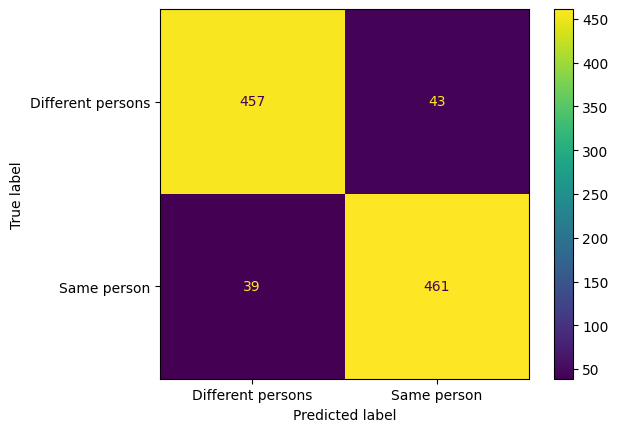

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Different persons', 'Same person'])
disp.plot()
plt.show()